# Book Recommendation System

In [2]:
#importing libraries
import numpy as np
import pandas as pd

#reading datasets
books = pd.read_csv(r"C:\Users\bhagyashree\Desktop\project\books.csv")
ratings = pd.read_csv(r"C:\Users\bhagyashree\Desktop\project\Ratings.csv")
users = pd.read_csv(r"C:\Users\bhagyashree\Desktop\project\Users.csv")

In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,2005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,60973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [5]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


# Performing Basic Exploratory Data Analysis

In [6]:
print(books.isnull().sum())
print(ratings.isnull().sum())
print(users.isnull().sum())

ISBN                    0
Book-Title              0
Book-Author             2
Year-Of-Publication    22
Publisher               2
Image-URL-S             0
Image-URL-M             0
Image-URL-L             3
dtype: int64
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64
User-ID          0
Location         0
Age         110762
dtype: int64


In [7]:
print(books.columns.value_counts())
print(ratings.columns.value_counts())
print(users.columns.value_counts())

ISBN                   1
Book-Title             1
Book-Author            1
Year-Of-Publication    1
Publisher              1
Image-URL-S            1
Image-URL-M            1
Image-URL-L            1
Name: count, dtype: int64
User-ID        1
ISBN           1
Book-Rating    1
Name: count, dtype: int64
User-ID     1
Location    1
Age         1
Name: count, dtype: int64


In [8]:
print(books.shape) #calculate the number of rows and columns
print(ratings.shape)
print(users.shape)

(271379, 8)
(1149780, 3)
(278858, 3)


In [9]:
books.describe()

,Year-Of-Publication
count,271357.000000
mean,1959.760817
std,257.994226
min,0.000000
25%,1989.000000
50%,1995.000000
75%,2000.000000
max,2050.000000


In [10]:
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [11]:
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [12]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 271379 non-null  object 
 1   Book-Title           271379 non-null  object 
 2   Book-Author          271377 non-null  object 
 3   Year-Of-Publication  271357 non-null  float64
 4   Publisher            271377 non-null  object 
 5   Image-URL-S          271379 non-null  object 
 6   Image-URL-M          271379 non-null  object 
 7   Image-URL-L          271376 non-null  object 
dtypes: float64(1), object(7)
memory usage: 16.6+ MB


In [13]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [14]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [15]:
print(books.duplicated().sum())
print(ratings.duplicated().sum())
print(users.duplicated().sum())

0
0
0


# Visualisation

In [16]:
import seaborn as sns

In [17]:
sns.heatmap(ratings.corr(),annot=True)

ValueError: could not convert string to float: '034545104X'

<AxesSubplot:>

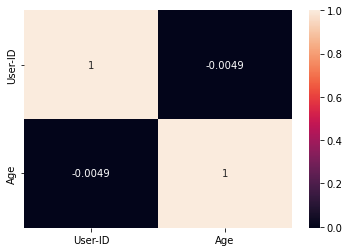

In [48]:
sns.heatmap(users.corr(),annot=True)

In [97]:
import matplotlib.pyplot as plt

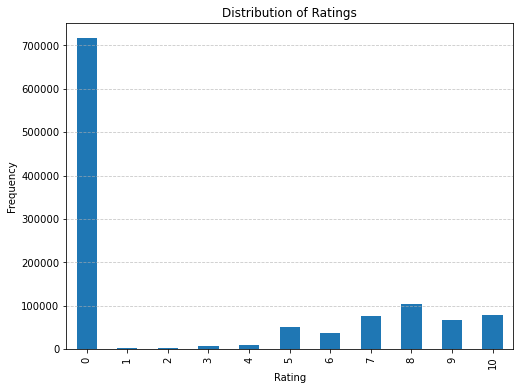

In [98]:
# Distribution of Ratings
plt.figure(figsize=(8, 6))
ratings['Book-Rating'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

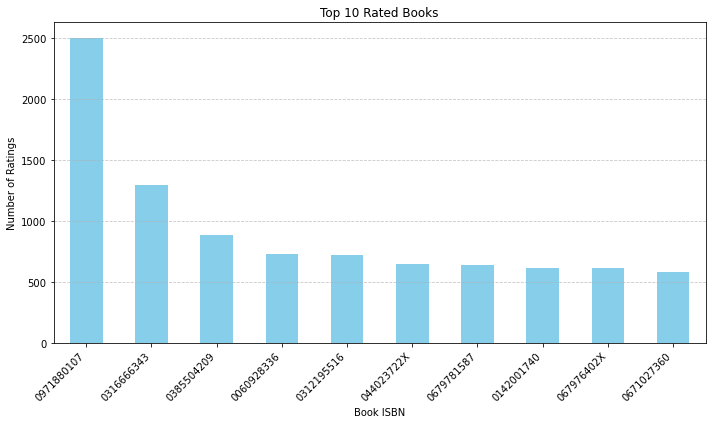

In [99]:
# Top N Rated Books
top_n = 10
top_rated_books = ratings.groupby('ISBN')['Book-Rating'].agg(['mean', 'count'])
top_rated_books.sort_values(by='count', ascending=False, inplace=True)
top_rated_books = top_rated_books.head(top_n)

plt.figure(figsize=(10, 6))
top_rated_books['count'].plot(kind='bar', color='skyblue')
plt.xlabel('Book ISBN')
plt.ylabel('Number of Ratings')
plt.title(f'Top {top_n} Rated Books')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

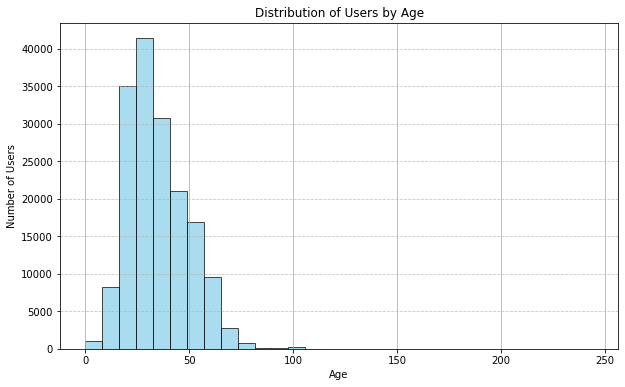

In [102]:
#User-Based Analysis
plt.figure(figsize=(10, 6))
users['Age'].hist(bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.title('Distribution of Users by Age')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Popularity Based Recommendation System

In [55]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [56]:
ratings.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [57]:
books_and_ratings=ratings.merge(books,on='ISBN')

In [58]:
books_and_ratings

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
196837,276680,086505505X,0,Home Crafts (Historic Communities (Paperback)),Bobbie Kalman,1990.0,Crabtree Publishing Company,http://images.amazon.com/images/P/086505505X.0...,http://images.amazon.com/images/P/086505505X.0...,http://images.amazon.com/images/P/086505505X.0...
196838,276680,1564407284,0,"The Old Sturbridge Village Cookbook, 2nd : Aut...",Caroline Sloat,1995.0,Globe Pequot,http://images.amazon.com/images/P/1564407284.0...,http://images.amazon.com/images/P/1564407284.0...,http://images.amazon.com/images/P/1564407284.0...
196839,276680,1582343594,0,City of Masks : A Cree Black Novel,Daniel Hecht,2004.0,Bloomsbury USA,http://images.amazon.com/images/P/1582343594.0...,http://images.amazon.com/images/P/1582343594.0...,http://images.amazon.com/images/P/1582343594.0...
196840,276681,1931333246,10,Chorus,Kurt Messick,2003.0,Dry Bones Press,http://images.amazon.com/images/P/1931333246.0...,http://images.amazon.com/images/P/1931333246.0...,http://images.amazon.com/images/P/1931333246.0...


In [59]:
books_with_ratings=books_and_ratings.groupby('Book-Title').count()['Book-Rating'].reset_index()
books_with_ratings

,Book-Title,Book-Rating
0,Earth Prayers From around the World: 365 Pray...,10
1,Final Fantasy Anthology: Official Strategy Gu...,4
2,Flight of Fancy: American Heiresses (Zebra Ba...,2
3,Little Comic Shop of Horrors (Give Yourself G...,4
4,Mystery Mile,2
...,...,...
68758,Ã?Â?lpiraten.,2
68759,Ã?Â?rger mit Produkt X. Roman.,4
68760,Ã?Â?sterlich leben.,1
68761,Ã?Â?stlich der Berge.,3


In [60]:
books_with_average_ratings=books_and_ratings.groupby('Book-Title').mean()['Book-Rating'].reset_index()
books_with_average_ratings=books_with_average_ratings.rename(columns={'Book-Rating':'avg-book-rating'})
books_with_average_ratings

,Book-Title,avg-book-rating
0,Earth Prayers From around the World: 365 Pray...,5.000000
1,Final Fantasy Anthology: Official Strategy Gu...,5.000000
2,Flight of Fancy: American Heiresses (Zebra Ba...,4.000000
3,Little Comic Shop of Horrors (Give Yourself G...,1.250000
4,Mystery Mile,0.000000
...,...,...
68758,Ã?Â?lpiraten.,0.000000
68759,Ã?Â?rger mit Produkt X. Roman.,5.250000
68760,Ã?Â?sterlich leben.,7.000000
68761,Ã?Â?stlich der Berge.,2.666667


In [61]:
popular_df=books_with_ratings.merge(books_with_average_ratings,on='Book-Title')
popular_df

,Book-Title,Book-Rating,avg-book-rating
0,Earth Prayers From around the World: 365 Pray...,10,5.000000
1,Final Fantasy Anthology: Official Strategy Gu...,4,5.000000
2,Flight of Fancy: American Heiresses (Zebra Ba...,2,4.000000
3,Little Comic Shop of Horrors (Give Yourself G...,4,1.250000
4,Mystery Mile,2,0.000000
...,...,...,...
68758,Ã?Â?lpiraten.,2,0.000000
68759,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
68760,Ã?Â?sterlich leben.,1,7.000000
68761,Ã?Â?stlich der Berge.,3,2.666667


In [63]:
popular_df=popular_df[popular_df['Book-Rating']>=300].sort_values('avg-book-rating',ascending=False).head(50)
popular_df

,Book-Title,Book-Rating,avg-book-rating
24879,Harry Potter and the Order of the Phoenix (Boo...,335,5.585075
24887,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
58327,The No. 1 Ladies' Detective Agency (Today Show...,431,3.417633
26521,How to Be Good,304,3.305921
49924,Snow Falling on Cedars,627,3.236045
1231,A Painted House,833,3.222089
53953,The Bridges of Madison County,371,3.097035
55703,The Firm,535,3.063551
47458,STONES FROM THE RIVER,345,2.976812
59162,The Rainmaker,388,2.695876


In [64]:
popular_df=popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','Book-Rating','avg-book-rating']]
popular_df

,Book-Title,Book-Author,Image-URL-M,Book-Rating,avg-book-rating
0,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,335,5.585075
4,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,575,4.895652
6,The No. 1 Ladies' Detective Agency (Today Show...,Alexander McCall Smith,http://images.amazon.com/images/P/1400034779.0...,431,3.417633
7,How to Be Good,Nick Hornby,http://images.amazon.com/images/P/1573229326.0...,304,3.305921
10,Snow Falling on Cedars,David Guterson,http://images.amazon.com/images/P/0151001006.0...,627,3.236045
17,A Painted House,John Grisham,http://images.amazon.com/images/P/044023722X.0...,833,3.222089
22,The Bridges of Madison County,Robert James Waller,http://images.amazon.com/images/P/044651652X.0...,371,3.097035
27,The Firm,John Grisham,http://images.amazon.com/images/P/0385416342.0...,535,3.063551
34,STONES FROM THE RIVER,Ursula Hegi,http://images.amazon.com/images/P/0684844729.0...,345,2.976812
38,The Rainmaker,JOHN GRISHAM,http://images.amazon.com/images/P/044022165X.0...,388,2.695876


In [66]:
popular_df['Image-URL-M'][27]

'http://images.amazon.com/images/P/0385416342.01.MZZZZZZZ.jpg'

# Collaborative Filtering Based Recommendation System 

In [67]:
user_rates=books_and_ratings.groupby('User-ID').count()['Book-Title']>=300
user_rated_books=user_rates[user_rates].index

In [70]:
filtered_rating=books_and_ratings[books_and_ratings['User-ID'].isin(user_rated_books)]
filtered_rating.head(5)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
18,98391,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
47,227447,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
65,278418,038550120X,0,A Painted House,JOHN GRISHAM,2001.0,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
70,11676,038550120X,10,A Painted House,JOHN GRISHAM,2001.0,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
128,98741,038550120X,0,A Painted House,JOHN GRISHAM,2001.0,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...


In [73]:
book_rates=books_and_ratings.groupby('Book-Title').count()['Book-Rating']>=50
book_total_rates=book_rates[book_rates].index

In [76]:
ratings['Book-Rating']>100

0          False
1          False
2          False
3          False
4          False
           ...  
1149775    False
1149776    False
1149777    False
1149778    False
1149779    False
Name: Book-Rating, Length: 1149780, dtype: bool

In [77]:
final_rating=filtered_rating[filtered_rating['Book-Title'].isin(book_total_rates)]

In [80]:
pivot = final_rating.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [81]:
pivot.head()

User-ID,11676,16795,35859,36836,55492,60244,72992,73394,76352,98391,...,190925,198711,204864,212898,227447,230522,234623,235105,261105,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
16 Lighthouse Road,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,8.0,...,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
204 Rosewood Lane,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,8.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper)),0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
"A Child Called \It\"": One Child's Courage to Survive""",0.0,10.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN
A Fine Balance,0.0,NaN,NaN,0.0,NaN,10.0,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [82]:
pivot.fillna(0,inplace=True)

In [83]:
pivot

User-ID,11676,16795,35859,36836,55492,60244,72992,73394,76352,98391,...,190925,198711,204864,212898,227447,230522,234623,235105,261105,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204 Rosewood Lane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper)),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"A Child Called \It\"": One Child's Courage to Survive""",0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Fine Balance,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
What Looks Like Crazy On An Ordinary Day,10.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
What to Expect When You're Expecting (Revised Edition),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Where is Joe Merchant?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model Building

In [84]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_scores=cosine_similarity(pivot)
similarity_scores.shape

(258, 258)

In [96]:
def recommend(book_name):
    # index fetch
    indices = np.where(pivot.index==book_name)[0]
    if len(indices) == 0:
        print(f"No matches found for book '{book_name}'")
        return None
    
    index = indices[0]
    similar_items = sorted(list(enumerate(similarity_scores[index])), key=lambda x: x[1], reverse=True)[1:5]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == pivot.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Publisher'].values))
        
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)
    
    return data

result = recommend('A Fine Balance')
if result:
    print(result)


[["Angela's Ashes: A Memoir", 'Frank McCourt', 'Scribner', 'http://images.amazon.com/images/P/068484267X.01.MZZZZZZZ.jpg'], ['Angle of Repose (Contemporary American Fiction)', 'Wallace Stegner', 'Penguin Books', 'http://images.amazon.com/images/P/014016930X.01.MZZZZZZZ.jpg'], ['I Capture the Castle', 'Dodie Smith', "St. Martin's Griffin", 'http://images.amazon.com/images/P/031231616X.01.MZZZZZZZ.jpg'], ['The Crimson Petal and the White', 'Michel Faber', 'Harcourt', 'http://images.amazon.com/images/P/015100692X.01.MZZZZZZZ.jpg']]
